In [1]:
import numpy as np
import seaborn as sns
from scipy.stats import norm

# a

In [2]:
n = 500
mi0 = 1
mi1 = 5
sigma0 = 1
sigma1 = 2
pi0 = 0.3
pi1 = 0.7

In [3]:
n0 = int(n*pi0)
n1 = int(n*pi1)

In [4]:
mixture_0 = np.random.normal(mi0, np.sqrt(sigma0), n0)
mixture_1 = np.random.normal(mi1, np.sqrt(sigma1), n1)
mixture = np.concatenate((mixture_0, mixture_1))

In [7]:
points = np.linspace(min(mixture), max(mixture), 100)

In [8]:
true_distr = pi0*norm(mi0, sigma0).pdf(points) + pi1*norm(mi1, sigma1).pdf(points)

<Axes: ylabel='Count'>

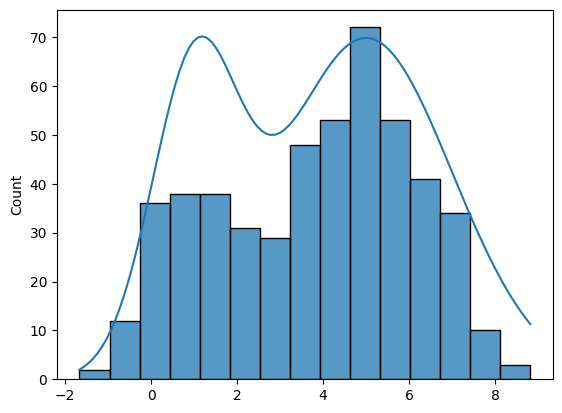

In [9]:
sns.histplot(mixture, bins=15)
sns.lineplot(x=points, y=true_distr*n)

# b

$p(x_i | G_i=0, \theta) = N(\mu_0, \sigma_0^2)$

$p(x_i | G_i=1, \theta) = N(\mu_1, \sigma_1^2)$

$p(x_i | G_i=g_i, \theta) = (1-g_i)N(\mu_0, \sigma_0^2) + g_iN(\mu_1, \sigma_1^2)$

$\sum_{i=1}^n{\log {p(X_i, G_i=g_i | \theta)}} = \sum_{i=1}^n{\log {p(X_i | G_i=g_i, \theta) p(G_i=g_i | \theta)}} = \sum_{i=1}^n{(1-g_i)(\log{N(\mu_0, \sigma_0^2)} + \log{\pi_0}) + g_i(\log{N(\mu_1, \sigma_1^2)} + \log{\pi_1})}$

# c

In [10]:
def e_step(x, m0, m1, s0, s1, p0, p1):
    element0 = p0*norm(m0, np.sqrt(s0)).pdf(x)
    element1 = p1*norm(m1, np.sqrt(s1)).pdf(x)
    return element1 / (element0+element1)

In [11]:
e = e_step(mixture, mi0, mi1, sigma0, sigma1, pi0, pi1)

# d

In [12]:
def m_step(gamma, x):
    mi_0 = np.sum((1-gamma)*x)/np.sum(1-gamma)
    mi_1 = np.sum(gamma*x)/np.sum(gamma)
    sigma_0 = np.sum((1-gamma)*(x-mi_0)**2)/np.sum(1-gamma)
    sigma_1 = np.sum(gamma*(x-mi_1)**2)/np.sum(gamma)
    pi_1 = np.mean(gamma)
    pi_0 = 1 - pi_1
    return mi_0, mi_1, sigma_0, sigma_1, pi_0, pi_1

# e

In [19]:
def em(x, mi_0, mi_1, sigma_0, sigma_1, pi_0=0.5, pi_1=0.5, steps=100):
    for step in range(steps):
        weights = e_step(x, mi_0, mi_1, sigma_0, sigma_1, pi_0, pi_1)
        mi_0, mi_1, sigma_0, sigma_1, pi_0, pi_1 = m_step(weights, x)
    return mi_0, mi_1, sigma_0, sigma_1, pi_0, pi_1

In [20]:
est_mi0, est_mi1, est_sigma0, est_sigma1, est_pi0, est_pi1 = em(mixture, 1, 5, 1, 2, steps=500)

# f

In [26]:
est_distr = est_pi0*norm(est_mi0, est_sigma0).pdf(points) + est_pi1*norm(est_mi1, est_sigma1).pdf(points)

<Axes: ylabel='Count'>

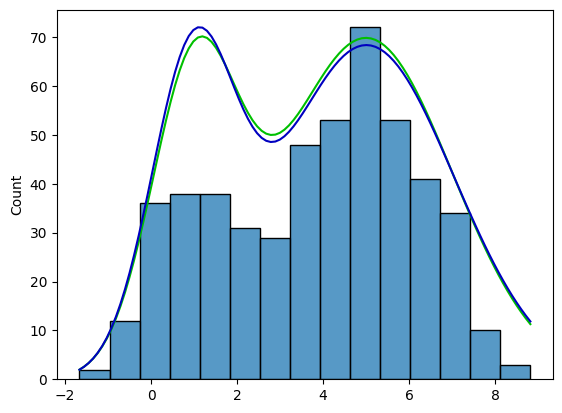

In [27]:
sns.histplot(mixture, bins=15)
sns.lineplot(x=points, y=true_distr*n, color='#00c000')
sns.lineplot(x=points, y=est_distr*n, color='#0000c0')